In [ ]:
!pip install mtcnn

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from glob import glob

In [7]:
import os

In [8]:
IMAGE_SIZE = [224, 224]


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [10]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 98% 263M/269M [00:01<00:00, 211MB/s]
100% 269M/269M [00:01<00:00, 194MB/s]


In [11]:
!unzip /content/gender-classification-dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./Validation/male/067031.jpg.jpg  
  inflating: ./Validation/male/067038.jpg.jpg  
  inflating: ./Validation/male/067040.jpg.jpg  
  inflating: ./Validation/male/067046.jpg.jpg  
  inflating: ./Validation/male/067048.jpg.jpg  
  inflating: ./Validation/male/067054.jpg.jpg  
  inflating: ./Validation/male/067064.jpg.jpg  
  inflating: ./Validation/male/067068.jpg.jpg  
  inflating: ./Validation/male/067069.jpg.jpg  
  inflating: ./Validation/male/067086.jpg.jpg  
  inflating: ./Validation/male/067091.jpg.jpg  
  inflating: ./Validation/male/067099.jpg.jpg  
  inflating: ./Validation/male/067101.jpg.jpg  
  inflating: ./Validation/male/067102.jpg.jpg  
  inflating: ./Validation/male/067112.jpg.jpg  
  inflating: ./Validation/male/067117.jpg.jpg  
  inflating: ./Validation/male/067119.jpg.jpg  
  inflating: ./Validation/male/067133.jpg.jpg  
  inflating: ./Validation/male/067143.jpg.jpg  
  inflating: ./Validation/male/067152

In [12]:
train_path = r"/content/Training"
test_path = r"/content/Validation"

In [13]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 1s 0us/step


In [14]:
for layer in vgg16.layers:
    layer.trainable = False

In [15]:
folders = glob(r'/content/Training/*')

In [16]:
folders

['/content/Training/male', '/content/Training/female']

In [17]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory(r"/content/Training",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 47009 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory(r"//content/Validation",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11649 images belonging to 2 classes.


In [24]:
len(training_set)

1470

In [25]:
len(test_set)

365

In [27]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=100,
  validation_steps=65
)

Epoch 1/20
100/100 [==============================] - 69s 688ms/step - loss: 0.2436 - accuracy: 0.9081 - val_loss: 0.1861 - val_accuracy: 0.9337
Epoch 2/20
100/100 [==============================] - 65s 648ms/step - loss: 0.2131 - accuracy: 0.9187 - val_loss: 0.2731 - val_accuracy: 0.8880
Epoch 3/20
100/100 [==============================] - 68s 677ms/step - loss: 0.2160 - accuracy: 0.9154 - val_loss: 0.1696 - val_accuracy: 0.9322
Epoch 4/20
100/100 [==============================] - 65s 647ms/step - loss: 0.2116 - accuracy: 0.9169 - val_loss: 0.1531 - val_accuracy: 0.9389
Epoch 5/20
100/100 [==============================] - 65s 646ms/step - loss: 0.2219 - accuracy: 0.9112 - val_loss: 0.1923 - val_accuracy: 0.9356
Epoch 6/20
100/100 [==============================] - 65s 646ms/step - loss: 0.1928 - accuracy: 0.9291 - val_loss: 0.1515 - val_accuracy: 0.9466
Epoch 7/20
100/100 [==============================] - 65s 647ms/step - loss: 0.2576 - accuracy: 0.9072 - val_loss: 0.2470 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


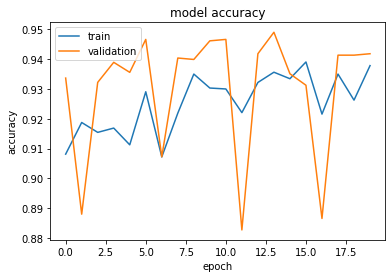

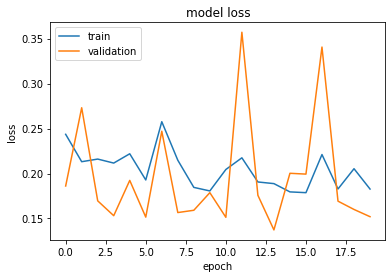

In [29]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
model.save("Gender_vgg16_final.h5")